In [15]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [13]:
f=open('diffusion_statistics.txt','r')
f.readline()
up=[]
down=[]
for line in f.readlines():
    data=line.split()
    up.append(data[0::4])
    down.append(data[1::4])
f.close()

In [109]:
up=np.array(up,dtype=int)
down=np.array(down,dtype=int)
averaged_up=np.mean(up,axis=0)
averaged_down=np.mean(down,axis=0)

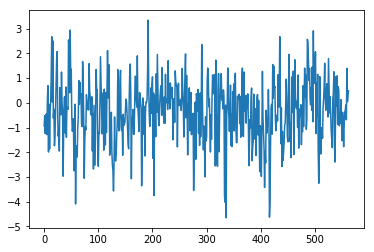

In [110]:
plt.plot(averaged_up-averaged_down)
plt.show()

In [123]:
up[1000][up[1000]>100].shape

(333,)

In [107]:
up[up>1].shape

(2491746,)

In [235]:
(averaged_up-averaged_down)[380:420]

array([-0.67826631, -1.01375287,  0.19524901,  0.59804126, -2.34778079,
       -1.80975203, -1.56011669,  0.34903105, -0.72160867, -1.46780579,
       -0.23275682, -2.1308606 , -1.2033757 ,  0.23775787,  0.33527818,
       -1.30068764,  0.10356324, -1.30943947, -2.78537195, -0.92769327,
       -1.08397583, -2.97624505, -1.18107939,  1.27193165, -0.56574286,
       -1.14711398, -1.84100854, -3.42404668, -1.96249219, -2.42446343,
       -0.30172953, -1.22796416, -1.00687643, -0.79766618,  0.53594499,
       -0.64450927, -4.62408835, -4.00645968, -1.67993332, -0.21817045])

In [236]:
left=380
right=420

In [237]:
data_up=up[:,left:right]
#data_up=data_up[data_up>0]
data_down=down[:,left:right]

In [206]:
a=(data_up-data_down).flatten()
a=a[a!=0]
print(a[:100])

[   24    23    22    23    21    22    22    23    24    22   606 -1705
  -469  -388   395    24 -3509  -429   455    84   219  -327   -57  -223
   290    -1     4     1    12    -1    -2     4     2    -6    -9    12
   599   600  -235  -141   141   517  -282    94   -47  -282   -94   -12
   -12    20     2     3   -55   -26    17    -8     7    38   595   600
  -329  -353   -46   204   158  -205  -195     2    -1     3    -2 -1396
  -419    -2    -4    -4     3     4    -1    50    11   -19    -3    -4
    -2    -4     8    -3     5     4    -5    -1  -158  -196    95  -531
 -1453   -79   371  1980]


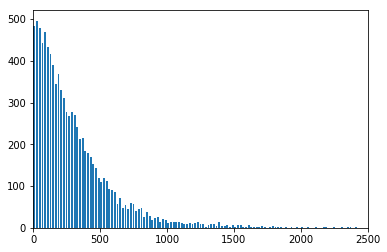

In [232]:

hist,bins=np.histogram(data_up[data_up>0],range=(0,10000),bins=500)
width=0.7*(bins[1]-bins[0])
center=(bins[:-1]+bins[1:])/2
plt.bar(center,hist,align='center',width=width,label='up')
#plt.xscale('log')

plt.xlim([0,2500])
plt.show()

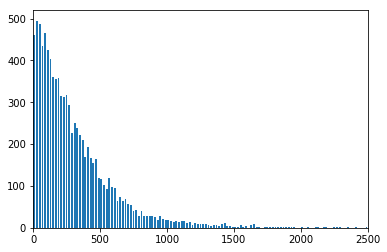

In [231]:
hist,bins=np.histogram(data_down[data_down>0],range=(0,10000),bins=500)
width=0.7*(bins[1]-bins[0])
center=(bins[:-1]+bins[1:])/2
plt.bar(center,hist,align='center',width=width,label='down')
plt.xlim([0,2500])
plt.show()

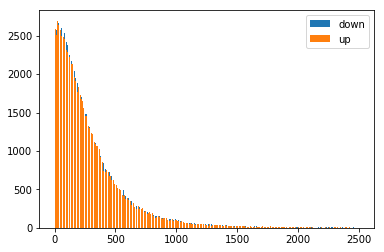

In [241]:
hist_down,bins=np.histogram(data_down[data_down>0],range=(0,2500),bins=500)
width=0.7*(bins[1]-bins[0])
center=(bins[:-1]+bins[1:])/2
plt.bar(center,hist_down,align='center',width=width,label='down')


hist_up,bins=np.histogram(data_up[data_up>0],range=(0,2500),bins=500)
width=0.7*(bins[1]-bins[0])
center=(bins[:-1]+bins[1:])/2
plt.bar(center,hist_up,align='center',width=width,label='up')
#plt.xscale('log')


plt.legend()
#plt.xlim([0,2500])
plt.show()

In [245]:
scipy.stats.wilcoxon(hist_up,hist_down,zero_method='wilcox')

WilcoxonResult(statistic=52865.0, pvalue=0.89415814996709475)